In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Libraries imported')


Libraries imported


In [2]:
data = {
    'Outlook':['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny','Rain','Sunny','Overcast','Overcast','Rain'],
    'Temperature':['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild'],
    'Humidity':['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal','Normal','High','Normal','High'],
    'Wind':['Weak','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Strong'],
    'PlayTennis':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
}
df = pd.DataFrame(data)
df.to_csv('play_tennis.csv', index=False)
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
dataset = pd.read_csv('play_tennis.csv')
dataset.head(10)


,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
print('Shape:', dataset.shape)
print('\nColumns:', dataset.columns.tolist())
print('\nClass Distribution:')
dataset['PlayTennis'].value_counts()

Shape: (14, 5)

Columns: ['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis']

Class Distribution:


,count
PlayTennis,
Yes,9
No,5


In [5]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
encoded_df = dataset.copy()
for col in encoded_df.columns:
    encoders[col] = LabelEncoder()
    encoded_df[col] = encoders[col].fit_transform(encoded_df[col])
encoded_df.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [6]:
X = encoded_df.drop('PlayTennis', axis=1)
y = encoded_df['PlayTennis']
X.head()

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print('Training size:', X_train.shape)
print('Testing size:', X_test.shape)


Training size: (9, 4)
Testing size: (5, 4)


In [8]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=1)
dt.fit(X_train, y_train)
print('Decision Tree model trained')

Decision Tree model trained


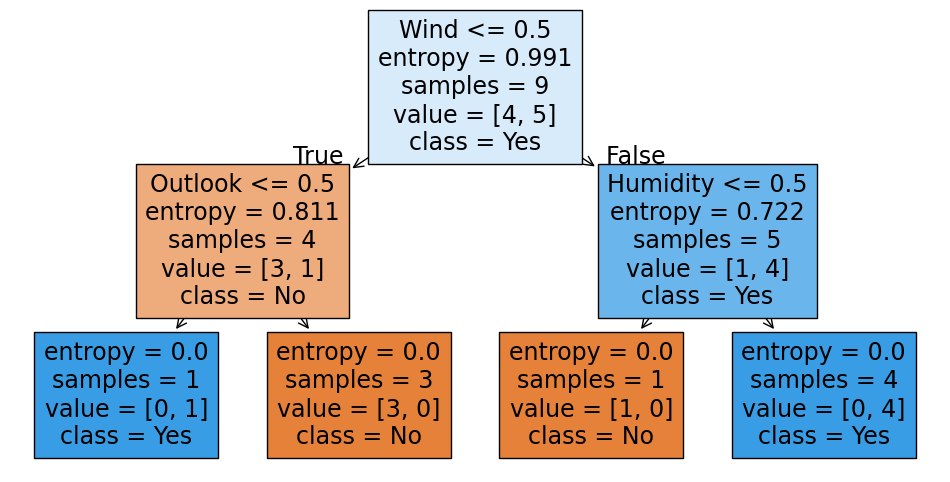

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plot_tree(dt, feature_names=X.columns, class_names=['No','Yes'], filled=True)
plt.show()

In [10]:
y_pred = dt.predict(X_test)
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
results['Status'] = results.apply(lambda r: 'Correct' if r.Actual == r.Predicted else 'Wrong', axis=1)
display(results)
print('\nAccuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

,Actual,Predicted,Status
0,1,0,Wrong
1,0,0,Correct
2,1,1,Correct
3,1,0,Wrong
4,1,0,Wrong



Accuracy: 0.4

Confusion Matrix:
 [[1 0]
 [3 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       1.00      0.25      0.40         4

    accuracy                           0.40         5
   macro avg       0.62      0.62      0.40         5
weighted avg       0.85      0.40      0.40         5



In [11]:
sample = pd.DataFrame({
    'Outlook':['Sunny'],
    'Temperature':['Mild'],
    'Humidity':['High'],
    'Wind':['Weak']
})

# encode sample using same encoders
encoded_sample = sample.copy()
for col in encoded_sample.columns:
    encoded_sample[col] = encoders[col].transform(encoded_sample[col])

prediction = dt.predict(encoded_sample)
label = encoders['PlayTennis'].inverse_transform(prediction)
print('Prediction for sample:', label[0])

Prediction for sample: No
